# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file

In [3]:
df=pd.read_csv("DoctorVisits-DA.csv")
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


# more information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


# statistical description of dataset

In [5]:
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


# Number of Duplicates found in the Dataset 

In [6]:
df.isnull().sum()

Unnamed: 0    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64

# Find out Total number of People based on their count of illness. 

In [7]:
df['illness'].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

# Find out Total number of People based on gender and their count of illness. 

In [8]:
df['gender'].value_counts()

gender
female    2702
male      2488
Name: count, dtype: int64

# Analyse Maximum, Minimum and Medium income People 

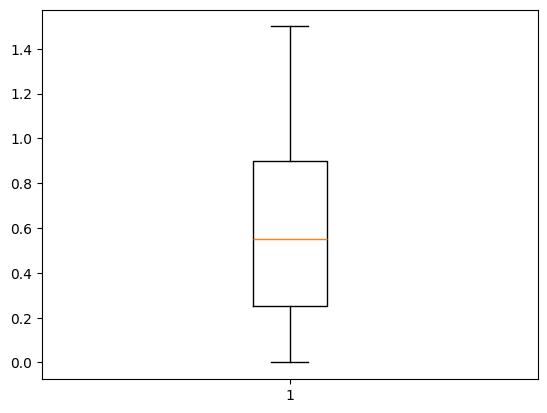

In [9]:
x=list(df.income)
plt.boxplot(x)
plt.show()

# Visualize, is there any missing values in the dataset using Heat map chart

<Axes: >

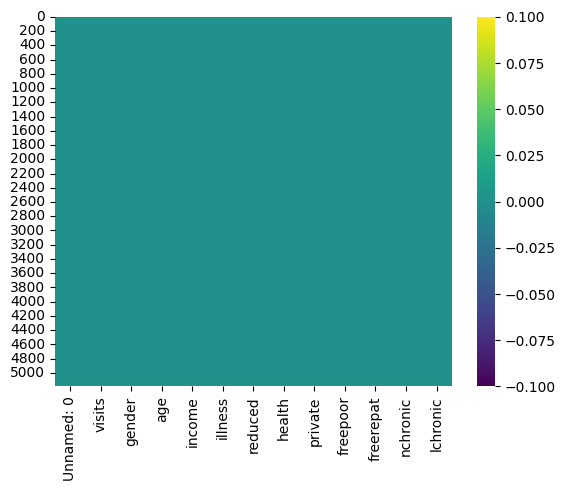

In [14]:
sns.heatmap(df.isnull(),cbar=True,cmap='viridis')

 # Analyse how income of People affects the number of visits to the Hospital 

Text(0, 0.5, 'visits')

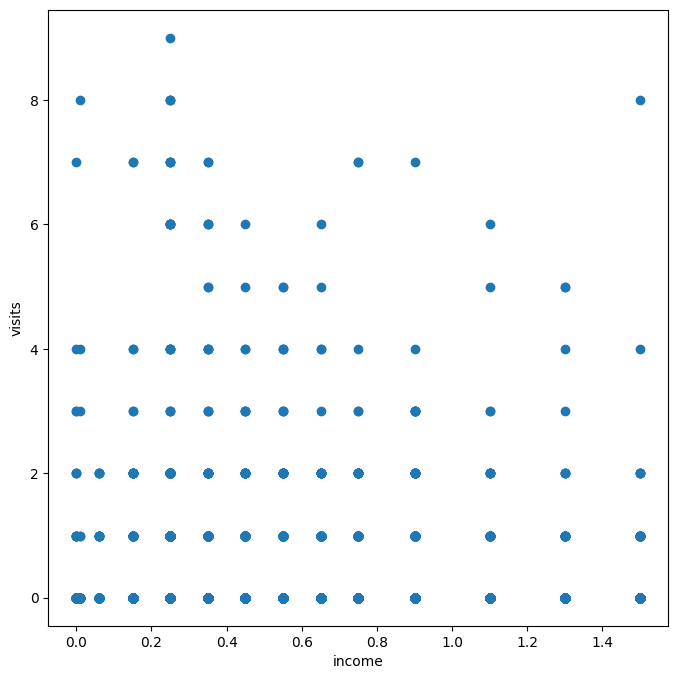

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# Count and Visualize the number of Males and Females affected by illness.

<Axes: xlabel='gender', ylabel='Count'>

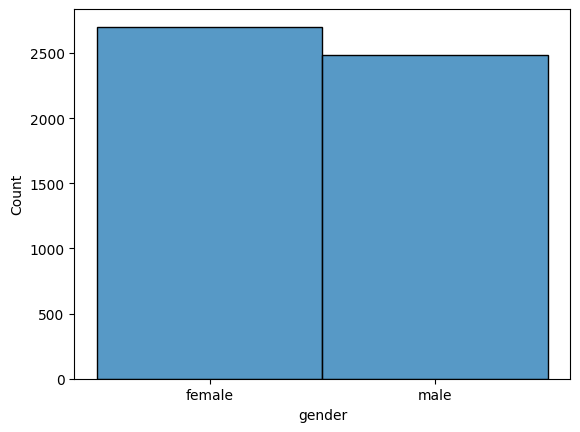

In [19]:
sns.histplot(df.gender,bins=2)

 # Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age. Also calculate the Percentage of People having Private Health Insurance. 

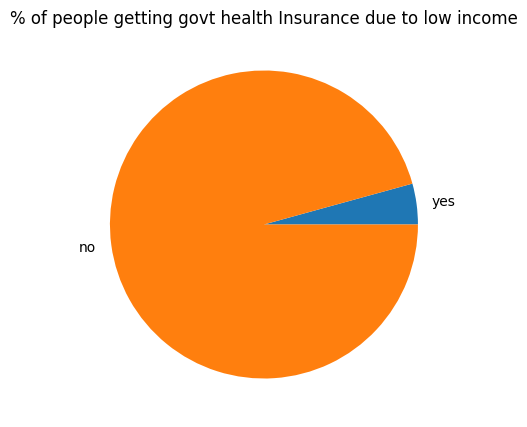

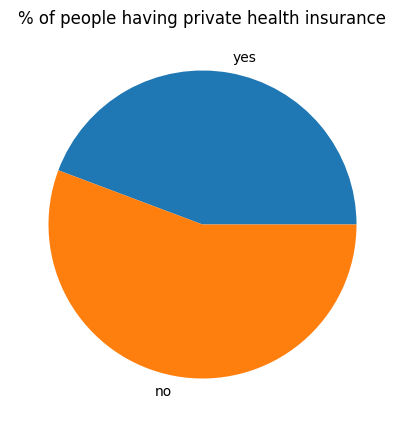

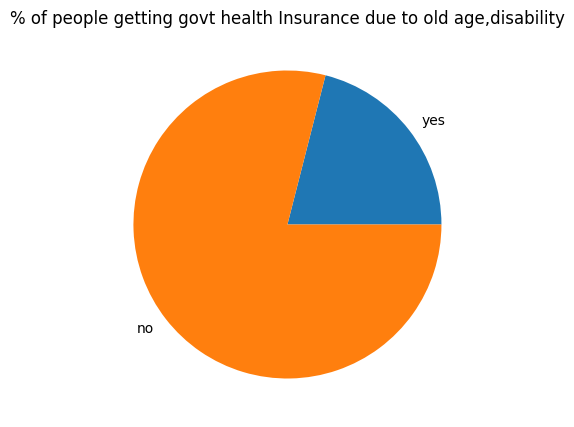

In [20]:
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income")
plt.show()


Y=df[df['private']=='yes']
N=df[df['private']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people having private health insurance")
plt.show()


Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to old age,disability")
plt.show()

# Plot bar chart to analyse the reduced days of activity due to illness based on Gender 

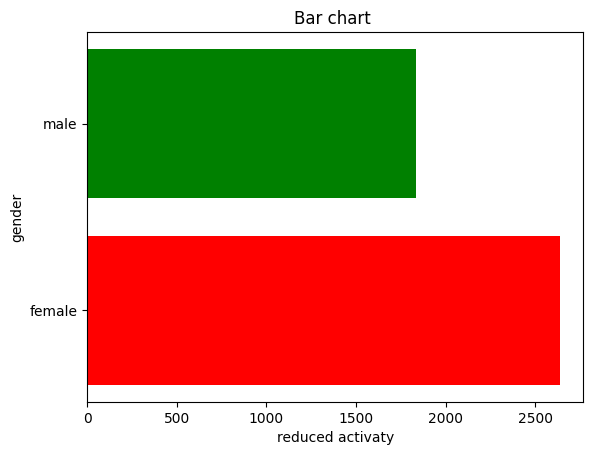

In [21]:
db=df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'],db['reduced'],color=['red','green'])
plt.title('Bar chart ')
plt.xlabel("reduced activaty")
plt.ylabel('gender')
plt.show()

# Relation between Health status and Activity reduction using heat map chart. 

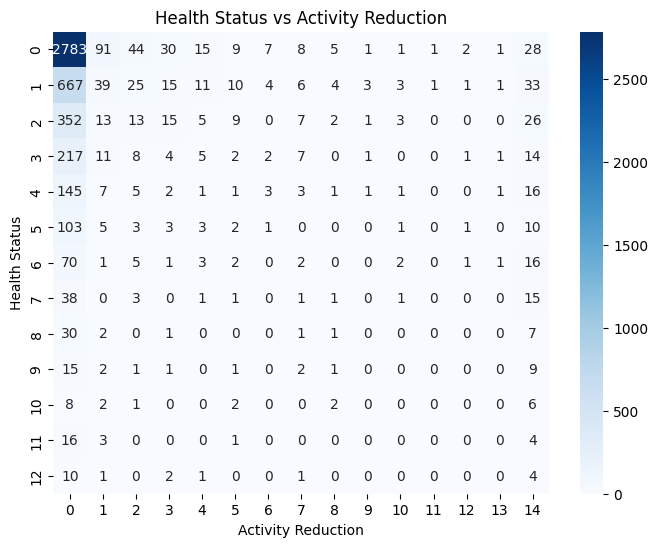

In [22]:
# Visualize the relationship between health status and activity reduction using a heatmap
plt.figure(figsize=(8, 6))

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(index='health', columns='reduced', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Health Status vs Activity Reduction')
plt.xlabel('Activity Reduction')
plt.ylabel('Health Status')
plt.show()

# Find the number of days of reduced activity of Male and Female separately due to illness. 

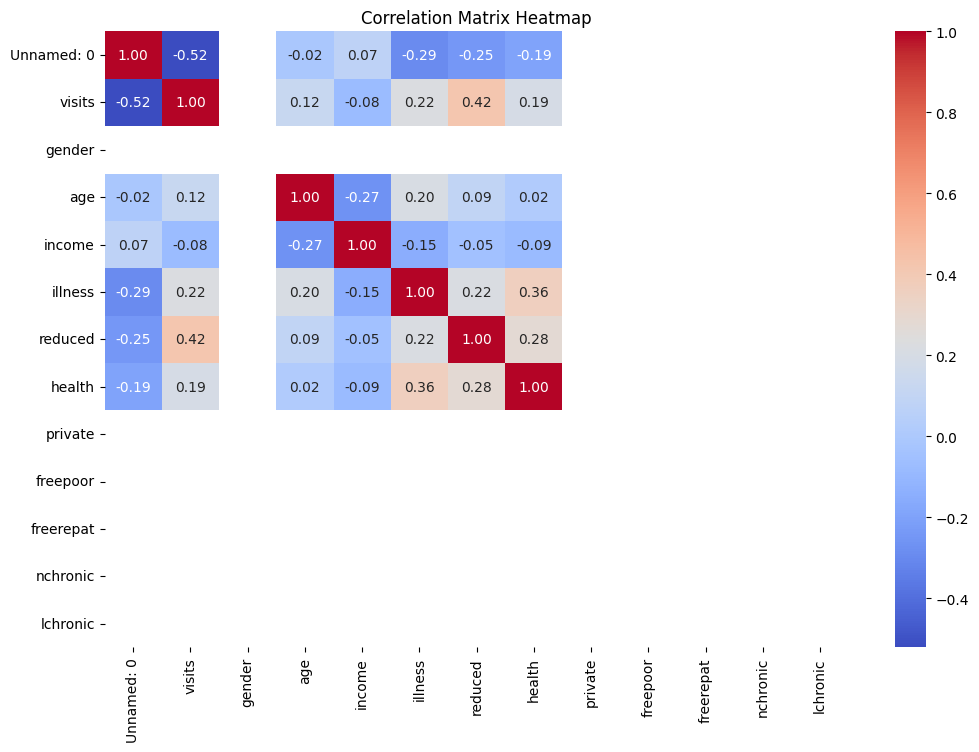

In [25]:
# Convert categorical variables to numeric where necessary
# For simplicity, let's convert 'gender' to numeric: female = 0, male = 1
df['gender'] = df['gender'].map({'female': 0, 'male': 1})

# Recalculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

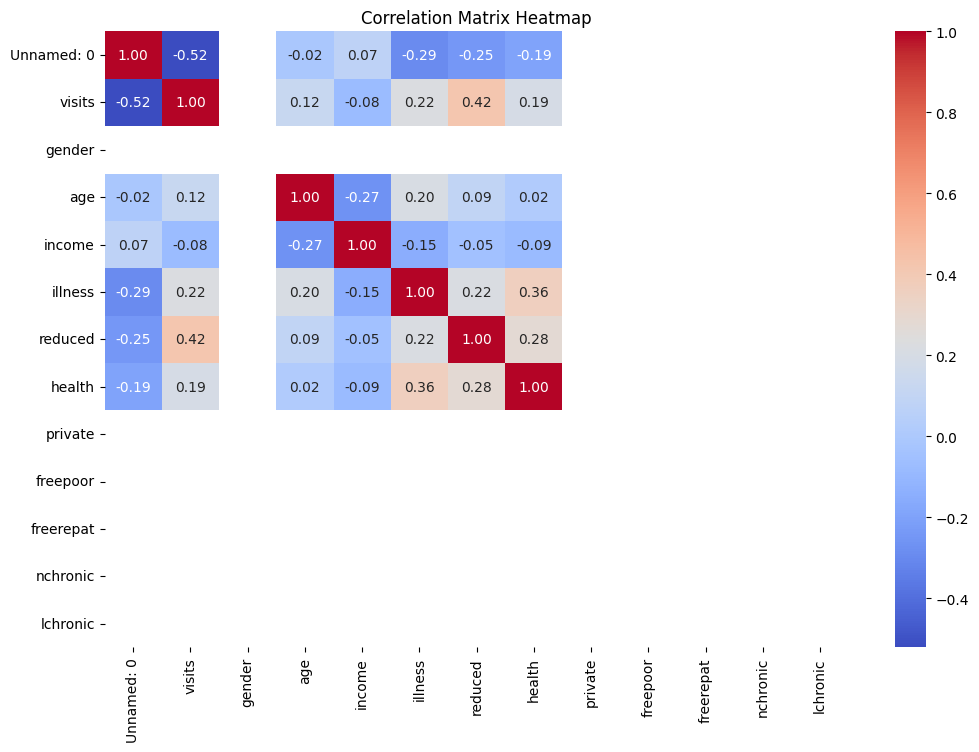

In [24]:
# Convert additional categorical variables to numeric
# Assuming 'yes' = 1 and 'no' = 0 for binary categorical variables
df['private'] = df['private'].map({'yes': 1, 'no': 0})
df['freepoor'] = df['freepoor'].map({'yes': 1, 'no': 0})
df['freerepat'] = df['freerepat'].map({'yes': 1, 'no': 0})
df['nchronic'] = df['nchronic'].map({'yes': 1, 'no': 0})
df['lchronic'] = df['lchronic'].map({'yes': 1, 'no': 0})
df['gender'] = df['gender'].map({'yes': 1, 'no': 0})

# Recalculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()